In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

step_score_list = []
for i in range(6):
    step_score = pd.read_csv('data/EGFR/lsmolgen/step_score_'+str(i)+'.csv')
    step_score_list.append(step_score['score'][:208])

step_score_np = np.array(step_score_list)


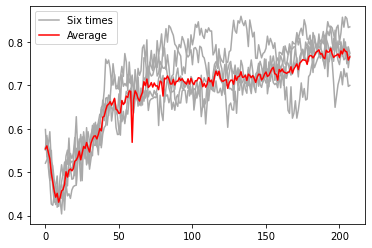

In [29]:
for i in [0, 1, 3, 4]:
    plt.plot(range(208), step_score_list[i], c='darkgrey')
plt.plot(range(208), step_score_list[5], c='darkgrey', label='Six times')
plt.plot(range(208), np.mean(step_score_np, axis=0), c='r', label='Average')
plt.legend()

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")

def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re


step_score = pd.read_csv('data/EGFR/step_score_transfer_prior_0.4_1.csv')
step_score_average = moving_average(step_score['score'], 2)



In [2]:
import sklearn
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from utils import valid_smiles
from rdkit import Chem, rdBase
rdBase.DisableLog('rdApp.error')

df_lig = pd.read_csv('data/EGFR/EGFR_pX_7.csv')
df_lig['label'] = 0

df_gen = pd.read_csv('data/baseline/egfr_lsmolgen_gen.smi')
mask = df_gen['Smiles'].apply(valid_smiles)
df_gen = df_gen[mask]
df_gen['label'] = 1

space = pd.concat([df_lig, df_gen])
space['fp'] = space['Smiles'].apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))

X = np.array(list(space['fp'].values))
X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)
space['component1'] = X_tsne[:, 0]
space['component2'] = X_tsne[:, 1]


In [3]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from metrics.utils import SA, NP


df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))



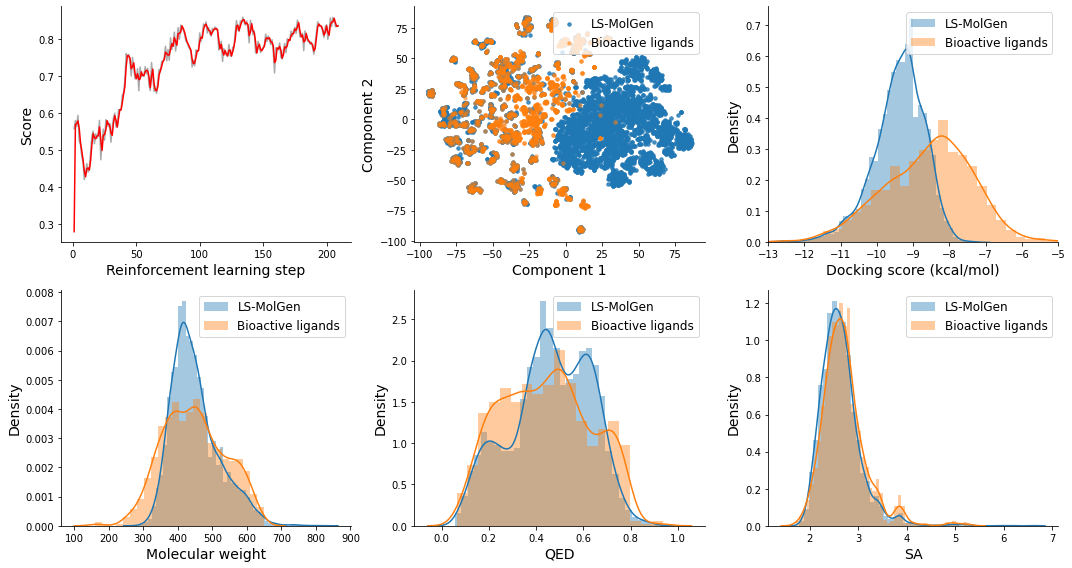

In [8]:
# Plot
plt.figure(figsize=(15, 8))

# plot step-score
plt.subplot(2, 3, 1)
plt.plot(step_score['step'], step_score['score'], c='darkgrey')
plt.plot(step_score['step'], step_score_average, c='r')

plt.xlabel('Reinforcement learning step', fontsize=14)
plt.ylabel('Score', fontsize=14)
sns.despine()
plt.tight_layout()

# plot chemical space
plt.subplot(2, 3, 2)
plt.scatter(space[space['label']==1]['component1'], space[space['label']==1]['component2'], s=12, alpha=0.8)
plt.scatter(space[space['label']==0]['component1'], space[space['label']==0]['component2'], s=12, alpha=0.5)
plt.xlabel('Component 1', fontsize=14)
plt.ylabel('Component 2', fontsize=14)
plt.legend(['LS-MolGen', 'Bioactive ligands'], fontsize=12, loc=1)
sns.despine()
plt.tight_layout()

# plot distribution of docking score
plt.subplot(2, 3, 3)
sns.distplot(df_gen['Ledock'], label='LS-MolGen')
sns.distplot(df_lig['Ledock'], label='Bioactive ligands')
sns.despine()
plt.xlabel('Docking score (kcal/mol)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.xlim([-13, -5])
plt.tight_layout()

# plot distribution of properties
plt.subplot(2, 3, 4)
sns.distplot(df_gen['MW'], label='LS-MolGen')
sns.distplot(df_lig['MW'], label='Bioactive ligands')
sns.despine()
plt.xlabel('Molecular weight', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.subplot(2, 3, 5)
sns.distplot(df_gen['QED'], label='LS-MolGen')
sns.distplot(df_lig['QED'], label='Bioactive ligands')
sns.despine()
plt.xlabel('QED', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.tight_layout()

plt.subplot(2, 3, 6)
sns.distplot(df_gen['SA'], label='LS-MolGen')
sns.distplot(df_lig['SA'], label='Bioactive ligands')
sns.despine()
plt.xlabel('SA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('figure/fig2.jpg', dpi=600)
# plt.savefig('figure/fig2.pdf')
# plt.savefig('figure/fig2.eps', dpi=600)

In [17]:
import sklearn
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from utils import valid_smiles
from rdkit import Chem, rdBase
from pandarallel import pandarallel
pandarallel.initialize()
rdBase.DisableLog('rdApp.error')

df_lig = pd.read_csv('data/EGFR/EGFR_pX_7.csv')
df_lig['label'] = 0

models = ['aae', 'vae', 'latentgan', 'reinvent', 'pocket2mol', 'moldqn', 'sbmolgen', 'lsmolgen']
for i, model in enumerate(models):
    df_gen = pd.read_csv('data/baseline/egfr_'+model+'_gen.smi')
    mask = df_gen['Smiles'].apply(valid_smiles)
    df_gen = df_gen[mask]
    df_gen['label'] = i+1
    df_lig = pd.concat([df_lig, df_gen])

df_lig['fp'] = df_lig['Smiles'].parallel_apply(lambda x: Morgan(Chem.MolFromSmiles(x), 2, 1024))

X = np.array(list(df_lig['fp'].values))
X_tsne = TSNE(random_state=20230214, n_components=2).fit_transform(X)


df_lig['component1'] = X_tsne[:, 0]
df_lig['component2'] = X_tsne[:, 1]

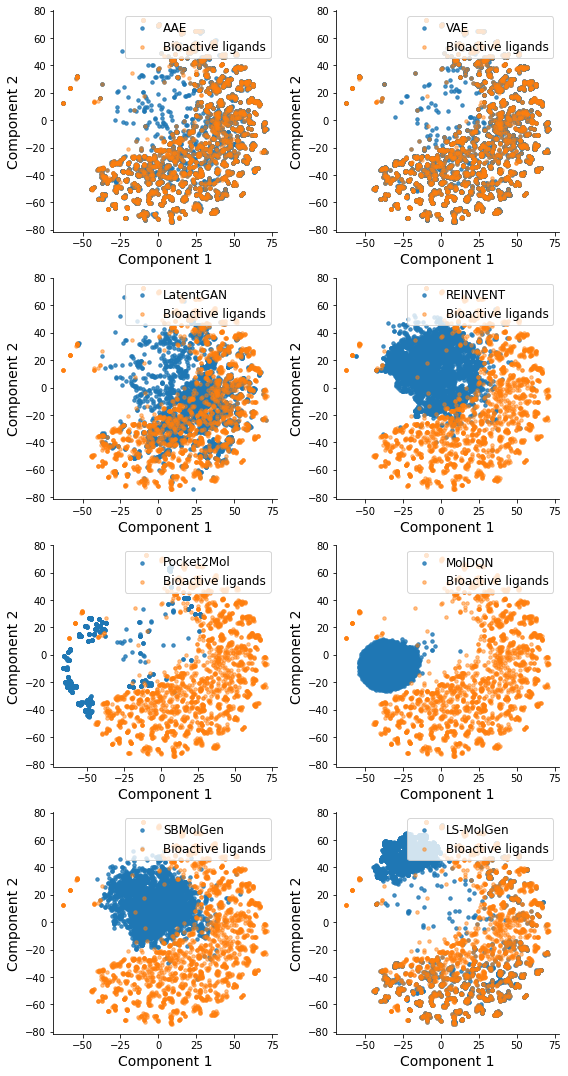

In [21]:
# Plot
plt.figure(figsize=(8, 15))

legend = ['AAE', 'VAE', 'LatentGAN', 'REINVENT', 'Pocket2Mol', 'MolDQN', 'SBMolGen', 'LS-MolGen']
# plot chemical space
for i in range(1, len(legend)+1):
    plt.subplot(4, 2, i)
    plt.scatter(df_lig[df_lig['label']==i]['component1'], df_lig[df_lig['label']==i]['component2'], s=12, alpha=0.8)
    plt.scatter(df_lig[df_lig['label']==0]['component1'], df_lig[df_lig['label']==0]['component2'], s=12, alpha=0.5)
    plt.xlabel('Component 1', fontsize=14)
    plt.ylabel('Component 2', fontsize=14)
    plt.legend([legend[i-1], 'Bioactive ligands'], fontsize=12, loc=1)
    sns.despine()
plt.tight_layout()


plt.savefig('figure/figs1.jpg', dpi=600)
# plt.savefig('figure/figs1.pdf')

以下为Mpro的plot

In [10]:
import sklearn
from sklearn.manifold import TSNE
from rdkit import Chem
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from utils import valid_smiles
from rdkit import Chem, rdBase
from rdkit.Chem import Descriptors
from metrics.utils import SA, NP
rdBase.DisableLog('rdApp.error')

df_lig = pd.read_csv('data/Mpro/Mpro_chembl_article.csv')
df_lig['label'] = 0

df_gen = pd.read_csv('data/baseline/mpro_lsmolgen_gen.smi')
mask = df_gen['Smiles'].apply(valid_smiles)
df_gen = df_gen[mask]
df_gen['label'] = 1

df_lig['MW'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_lig['logP'] = df_lig['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_lig['QED'] = df_lig['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_lig['SA'] = df_lig['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_lig['NP'] = df_lig['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))

df_gen['MW'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x)))
df_gen['logP'] = df_gen['Smiles'].apply(lambda x: Descriptors.MolLogP(Chem.MolFromSmiles(x)))
df_gen['QED'] = df_gen['Smiles'].apply(lambda x: Chem.QED.qed(Chem.MolFromSmiles(x)))
df_gen['SA'] = df_gen['Smiles'].apply(lambda x: SA(Chem.MolFromSmiles(x)))
df_gen['NP'] = df_gen['Smiles'].apply(lambda x: NP(Chem.MolFromSmiles(x)))


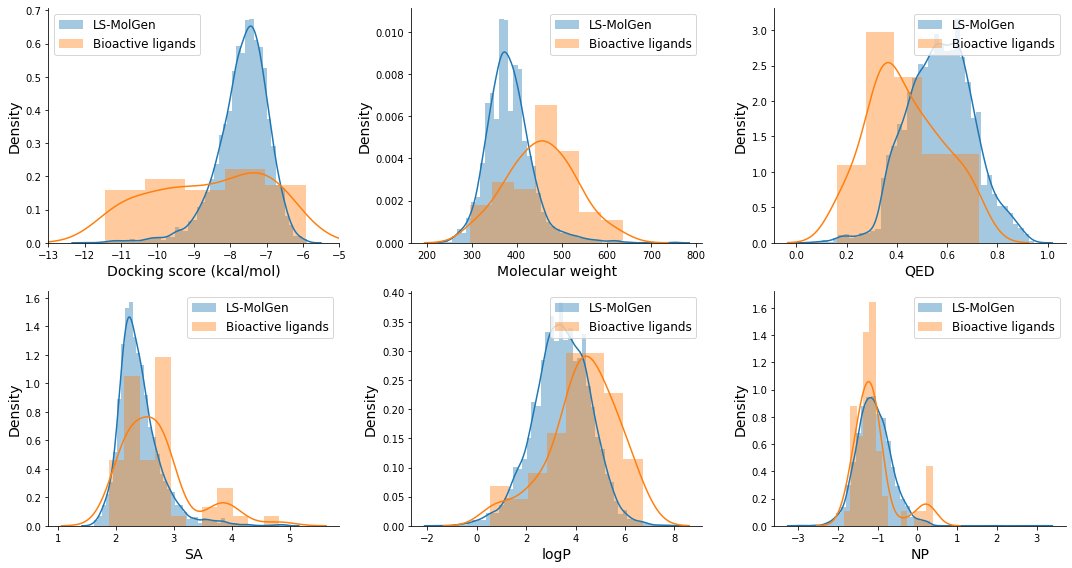

In [14]:
# Plot
plt.figure(figsize=(15, 8))

# plot distribution of docking score
plt.subplot(2, 3, 1)
sns.distplot(df_gen['Ledock'], label='LS-MolGen')
sns.distplot(df_lig['Ledock'], label='Bioactive ligands')
sns.despine()
plt.xlabel('Docking score (kcal/mol)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.xlim([-13, -5])
plt.tight_layout()

# plot distribution of properties
plt.subplot(2, 3, 2)
sns.distplot(df_gen['MW'], label='LS-MolGen')
sns.distplot(df_lig['MW'], label='Bioactive ligands')
sns.despine()
plt.xlabel('Molecular weight', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.subplot(2, 3, 3)
sns.distplot(df_gen['QED'], label='LS-MolGen')
sns.distplot(df_lig['QED'], label='Bioactive ligands')
sns.despine()
plt.xlabel('QED', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.tight_layout()

plt.subplot(2, 3, 4)
sns.distplot(df_gen['SA'], label='LS-MolGen')
sns.distplot(df_lig['SA'], label='Bioactive ligands')
sns.despine()
plt.xlabel('SA', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.subplot(2, 3, 5)
sns.distplot(df_gen['logP'], label='LS-MolGen')
sns.distplot(df_lig['logP'], label='Bioactive ligands')
sns.despine()
plt.xlabel('logP', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12, loc=1)
plt.tight_layout()

plt.subplot(2, 3, 6)
sns.distplot(df_gen['NP'], label='LS-MolGen')
sns.distplot(df_lig['NP'], label='Bioactive ligands')
sns.despine()
plt.xlabel('NP', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

plt.savefig('figure/figs1.jpg', dpi=600)
# plt.savefig('figure/figs1.pdf')

In [2]:
# plot highlight molecules match to ligands
from metrics.utils import compute_scaffold
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import warnings
warnings.filterwarnings("ignore")
from rdkit.Chem.Scaffolds import MurckoScaffold

smi_select = ['COc1cccc2[nH]c(C(=O)N[C@@H](CC(C)C)C(=O)N[C@@H](C[C@@H]3CCNC3=O)C(=O)CO)cc12', \
              'Cc1ccc(-n2sc(=O)n(Cc3ccc(F)cc3)c2=O)cc1', 'CCCOc1cc(Cl)cc(-c2cc(-c3ccccc3C#N)cn(-c3cccnc3)c2=O)c1']
ID = [22, 3327, 34]
smi_match = ['O=C(CNCc1ccccc1NC(=O)NCc1ccc[nH]c1=O)Nc1ccccc1', \
             'O=S(=O)(Cc1ccccc1)c1ccccc1CNC1=NS(=O)(=O)c2ccccc21', 'O=c1[nH]cccc1CSc1nnc(NCc2ccco2)cc1OCc1ccccc1']
    
for i, smi in enumerate(smi_select):
    mol = Chem.MolFromSmiles(smi)
    sca = MurckoScaffold.GetScaffoldForMol(mol)
    # Draw.MolToImage(mol, size=(300, 300), highlightSubstructs=[sca])
    hit_at = mol.GetSubstructMatch(sca)
    hit_bond = []
    for bond in sca.GetBonds():
        aid1 = hit_at[bond.GetBeginAtomIdx()]
        aid2 = hit_at[bond.GetEndAtomIdx()]
        hit_bond.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    d = rdMolDraw2D.MolDraw2DCairo(500, 500)
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    d.WriteDrawingText('./figure/lig'+str(ID[i])+'_highlight.png')
    
for i, smi in enumerate(smi_match):
    mol = Chem.MolFromSmiles(smi)
    sca = MurckoScaffold.GetScaffoldForMol(mol)
    # Draw.MolToImage(mol, size=(300, 300), highlightSubstructs=[sca])
    hit_at = mol.GetSubstructMatch(sca)
    hit_bond = []
    for bond in sca.GetBonds():
        aid1 = hit_at[bond.GetBeginAtomIdx()]
        aid2 = hit_at[bond.GetEndAtomIdx()]
        hit_bond.append(mol.GetBondBetweenAtoms(aid1, aid2).GetIdx())
    d = rdMolDraw2D.MolDraw2DCairo(500, 500)
    rdMolDraw2D.PrepareAndDrawMolecule(d, mol, highlightAtoms=list(hit_at), highlightBonds=hit_bond)
    d.FinishDrawing()
    d.WriteDrawingText('./figure/match_lig'+str(ID[i])+'_highlight.png')
    
    
for i, smi in enumerate(smi_match):
    img = Draw.MolToImage(Chem.MolFromSmiles(smi), size=(300, 300))
    img.save("./figure/match_lig"+str(ID[i])+".png")

In [99]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect as Morgan
from rdkit import DataStructs

fps_match = [Morgan(Chem.MolFromSmiles(x), 2, 1024) for x in smi_match]
fps_lig = [Morgan(Chem.MolFromSmiles(x), 2, 1024) for x in smi_select]
for i in range(len(fps_lig)):
    sim = DataStructs.FingerprintSimilarity(fps_lig[i], fps_match[i])
    print(sim)

0.15053763440860216
0.08450704225352113
0.1346153846153846


In [59]:
df = pd.read_csv('data/EGFR/Transfer_sample.smi')
df[df['Ledock']<-9].to_csv('data/EGFR/Transfer_sample_ledock_small_than_-9.smi', index=None)